Convolutional Neural Network

The network topology can be summarized as follows:
 * Convolutional layer with 32 feature maps of size 5×5.
 
    Pooling layer taking the max over 2*2 patches.
    
    
 * Convolutional layer with 64 feature maps of size 5×5.
 
    Pooling layer taking the max over 2*2 patches.
    
    
 * Convolutional layer with 128 feature maps of size 1×1.
 
    Pooling layer taking the max over 2*2 patches.
    
    
 * Flatten layer.
 * Fully connected layer with 1024 neurons and rectifier activation.
 
    Dropout layer with a probability of 50%.
    
    
 * Fully connected layer with 510 neurons and rectifier activation.
 
    Dropout layer with a probability of 50%.
    
    
 * Output layer.


In [1]:
# import essentials
import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
Using TensorFlow backend.


In [2]:
# read data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [4]:
# build a dictionary for easy access to object classes
objects = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

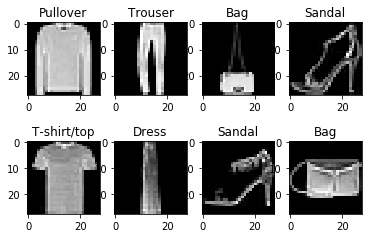

In [75]:
# let's have a quick look of those images
f, axes = plt.subplots(2, 4)
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = np.array(train_data.iloc[index, 1:]).reshape((28, 28))
        obj = train_data.iloc[index, 0]
        axe.imshow(img, cmap='gray')
        axe.set_title(objects[obj])


In [7]:
# separate the training data into images and labels
images = train_data.iloc[:, 1:]
labels = train_data.iloc[:, 0]

In [8]:
# reshape the images to fit CNNs
labels = labels.as_matrix()
images = images.as_matrix().reshape(images.shape[0], 1, 28, 28)

In [9]:
# features normalisation
def normalize(image_data):
    # Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    return (25.5 + 0.8 * image_data) / 255
train_features = normalize(images)

In [10]:
# one-hot encoding for labels
train_labels = np_utils.to_categorical(labels)

In [11]:
# divide data into training and validation set
train_features, vali_features, train_labels, vali_labels = train_test_split(train_features, train_labels, 
                                                                           test_size=0.15, random_state=80)

In [12]:
# check data shapes
print('train_features shape: ', train_features.shape)
print('vali_features shape: ', vali_features.shape)
print('train_labels shape: ', train_labels.shape)
print('vali_labels shape: ', vali_labels.shape)


train_features shape:  (51000, 1, 28, 28)
vali_features shape:  (9000, 1, 28, 28)
train_labels shape:  (51000, 10)
vali_labels shape:  (9000, 10)


In [61]:
# hyperparameters
epochs = 50
batch_size = 256

# build model
n_classes = 10
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(1, 28, 28), activation='relu',
          bias_initializer='RandomNormal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [62]:
# optimizer, the learning rate will decay with time by default settings

from keras.optimizers import Adam
opt = Adam(decay=0.001)

In [63]:
# compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
30

In [64]:
# training
training = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=50,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/50
51000/51000 [==============================] - 18s - loss: 0.9220 - acc: 0.6583 - val_loss: 0.4765 - val_acc: 0.8233
Epoch 2/50
51000/51000 [==============================] - 17s - loss: 0.5360 - acc: 0.8039 - val_loss: 0.3941 - val_acc: 0.8522
Epoch 3/50
51000/51000 [==============================] - 17s - loss: 0.4508 - acc: 0.8415 - val_loss: 0.3457 - val_acc: 0.8743
Epoch 4/50
51000/51000 [==============================] - 17s - loss: 0.4021 - acc: 0.8585 - val_loss: 0.3172 - val_acc: 0.8836
Epoch 5/50
51000/51000 [==============================] - 17s - loss: 0.3687 - acc: 0.8711 - val_loss: 0.2984 - val_acc: 0.8898
Epoch 6/50
51000/51000 [==============================] - 17s - loss: 0.3460 - acc: 0.8788 - val_loss: 0.2884 - val_acc: 0.8949
Epoch 7/50
51000/51000 [==============================] - 17s - loss: 0.3300 - acc: 0.8846 - val_loss: 0.2753 - val_acc: 0.8968
Epoch 8/50
51000/51000 [==============================]

In [78]:
training2 = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=5,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/5
51000/51000 [==============================] - 17s - loss: 0.1083 - acc: 0.9618 - val_loss: 0.2410 - val_acc: 0.9267
Epoch 2/5
51000/51000 [==============================] - 17s - loss: 0.1055 - acc: 0.9635 - val_loss: 0.2467 - val_acc: 0.9272
Epoch 3/5
51000/51000 [==============================] - 17s - loss: 0.1036 - acc: 0.9630 - val_loss: 0.2486 - val_acc: 0.9269
Epoch 4/5
51000/51000 [==============================] - 17s - loss: 0.1044 - acc: 0.9630 - val_loss: 0.2488 - val_acc: 0.9248
Epoch 5/5
51000/51000 [==============================] - 17s - loss: 0.1034 - acc: 0.9636 - val_loss: 0.2451 - val_acc: 0.9248


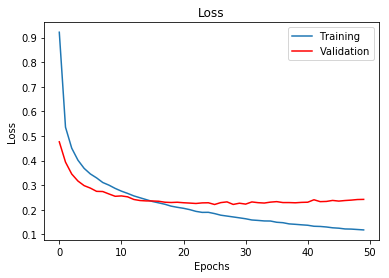

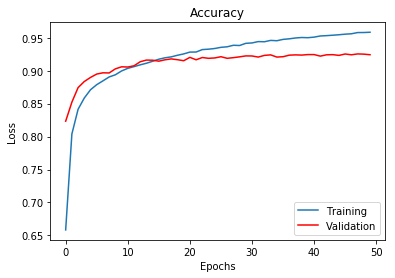

In [65]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [66]:
test_images = test_data.iloc[:, 1:]
test_labels = test_data.iloc[:, 0]
test_labels = test_labels.as_matrix()
test_images = test_images.as_matrix().reshape(test_images.shape[0], 1, 28, 28)
test_features = normalize(test_images)


In [67]:
from sklearn.metrics import accuracy_score
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)

In [68]:
accuracy_score(test_labels, pred_digits)

0.9214

# original MNIST

In [102]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

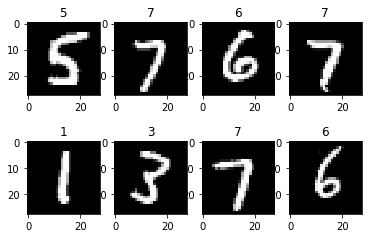

In [103]:
f, axes = plt.subplots(2, 4)
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = x_train[index]
        obj = y_train[index]
        axe.imshow(img, cmap='gray')
        axe.set_title(obj)

In [104]:
x_train = x_train.reshape((x_train.shape[0], 1, 28, 28))
x_test = x_test.reshape((x_test.shape[0], 1, 28, 28))

In [105]:
train_features = normalize(x_train)
train_labels = np_utils.to_categorical(y_train)

# divide data into training and validation set
train_features, vali_features, train_labels, vali_labels = train_test_split(train_features, train_labels, 
                                                                           test_size=0.15, random_state=80)

In [106]:
# hyperparameters
epochs = 50
batch_size = 256

# build model
n_classes = 10
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(1, 28, 28), activation='relu',
          bias_initializer='RandomNormal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [107]:
# optimizer, the learning rate will decay with time by default settings

from keras.optimizers import Adam
opt = Adam(decay=0.001)
# compile the model
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [108]:


training = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=50,
                     batch_size=batch_size, 
                     verbose=1)



Train on 51000 samples, validate on 9000 samples
Epoch 1/50
51000/51000 [==============================] - 18s - loss: 0.4653 - acc: 0.8498 - val_loss: 0.0775 - val_acc: 0.9763
Epoch 2/50
51000/51000 [==============================] - 17s - loss: 0.1105 - acc: 0.9688 - val_loss: 0.0488 - val_acc: 0.9854
Epoch 3/50
51000/51000 [==============================] - 17s - loss: 0.0765 - acc: 0.9790 - val_loss: 0.0381 - val_acc: 0.9874
Epoch 4/50
51000/51000 [==============================] - 17s - loss: 0.0588 - acc: 0.9835 - val_loss: 0.0352 - val_acc: 0.9899
Epoch 5/50
51000/51000 [==============================] - 17s - loss: 0.0506 - acc: 0.9862 - val_loss: 0.0273 - val_acc: 0.9919
Epoch 6/50
51000/51000 [==============================] - 17s - loss: 0.0428 - acc: 0.9887 - val_loss: 0.0290 - val_acc: 0.9926
Epoch 7/50
51000/51000 [==============================] - 17s - loss: 0.0349 - acc: 0.9906 - val_loss: 0.0274 - val_acc: 0.9921
Epoch 8/50
51000/51000 [==============================]

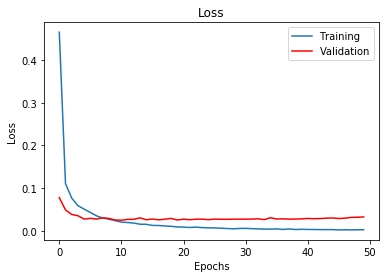

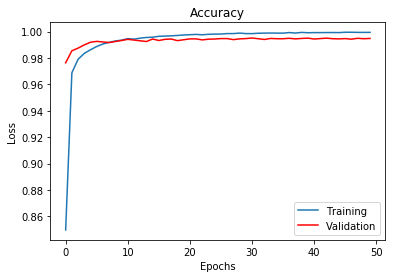

In [109]:
# show the loss and accuracy
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [110]:
test_features = normalize(x_test)
test_labels = y_test
pred = model.predict(test_features)
# convert predicions from categorical back to 0...9 digits
pred_digits = np.argmax(pred, axis=1)


In [111]:
accuracy_score(test_labels, pred_digits)

0.99419999999999997